#### Including Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading data from file

In [2]:
df=pd.read_csv(r"retail_customers_raw.csv")

#### Basic Analysis

In [3]:
#viewing top 5 rows to undesrtand the data
df.head()

,CustomerID,Age,Gender,Annual_Income,Spending_Score,Tenure,Avg_Purchase_Value,Num_Transactions,Last_Purchase_DaysAgo,Has_Credit_Card
0,1,56.0,Female,39818.293143,46.150547,0,66.219807,18,232,Yes
1,2,69.0,Female,28334.115729,44.482614,10,103.705025,13,75,No
2,3,46.0,Female,350000.000000,69.106004,17,48.522986,20,264,No
3,4,NaN,Female,49237.166767,45.620710,9,77.206375,21,283,No
4,5,60.0,Male,33066.438053,10.172359,2,15.167015,18,205,No


In [4]:
#finding the datatypes of column
df.dtypes

CustomerID                 int64
Age                      float64
Gender                    object
Annual_Income            float64
Spending_Score           float64
Tenure                     int64
Avg_Purchase_Value       float64
Num_Transactions           int64
Last_Purchase_DaysAgo      int64
Has_Credit_Card           object
dtype: object

In [5]:
# finding any column has null value and datatype of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             50 non-null     int64  
 1   Age                    48 non-null     float64
 2   Gender                 50 non-null     object 
 3   Annual_Income          48 non-null     float64
 4   Spending_Score         48 non-null     float64
 5   Tenure                 50 non-null     int64  
 6   Avg_Purchase_Value     50 non-null     float64
 7   Num_Transactions       50 non-null     int64  
 8   Last_Purchase_DaysAgo  50 non-null     int64  
 9   Has_Credit_Card        48 non-null     object 
dtypes: float64(4), int64(4), object(2)
memory usage: 4.0+ KB


In [6]:
# statistical measure of numeric column
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score,Tenure,Avg_Purchase_Value,Num_Transactions,Last_Purchase_DaysAgo
count,50.00000,48.000000,48.000000,48.000000,50.00000,50.000000,50.000000,50.000000
mean,25.50000,43.812500,66926.553226,48.014270,9.26000,457.849483,25.540000,157.900000
std,14.57738,15.168074,46189.849990,16.825084,6.75462,2820.677068,39.843167,94.371227
min,1.00000,19.000000,28334.115729,-20.000000,0.00000,9.339337,12.000000,4.000000
25%,13.25000,32.750000,46701.547432,41.062588,2.25000,27.335733,17.000000,75.000000
50%,25.50000,41.500000,61534.292137,48.653839,8.50000,42.647618,20.500000,156.000000
75%,37.75000,56.250000,76960.673586,58.360836,15.00000,76.600890,23.000000,222.000000
max,50.00000,69.000000,350000.000000,75.599074,20.00000,20000.000000,300.000000,364.000000


In [7]:
# total null value
df.isnull().sum()

CustomerID               0
Age                      2
Gender                   0
Annual_Income            2
Spending_Score           2
Tenure                   0
Avg_Purchase_Value       0
Num_Transactions         0
Last_Purchase_DaysAgo    0
Has_Credit_Card          2
dtype: int64

In [8]:
# size of data
df.shape

(50, 10)

#### Univariate Analysis

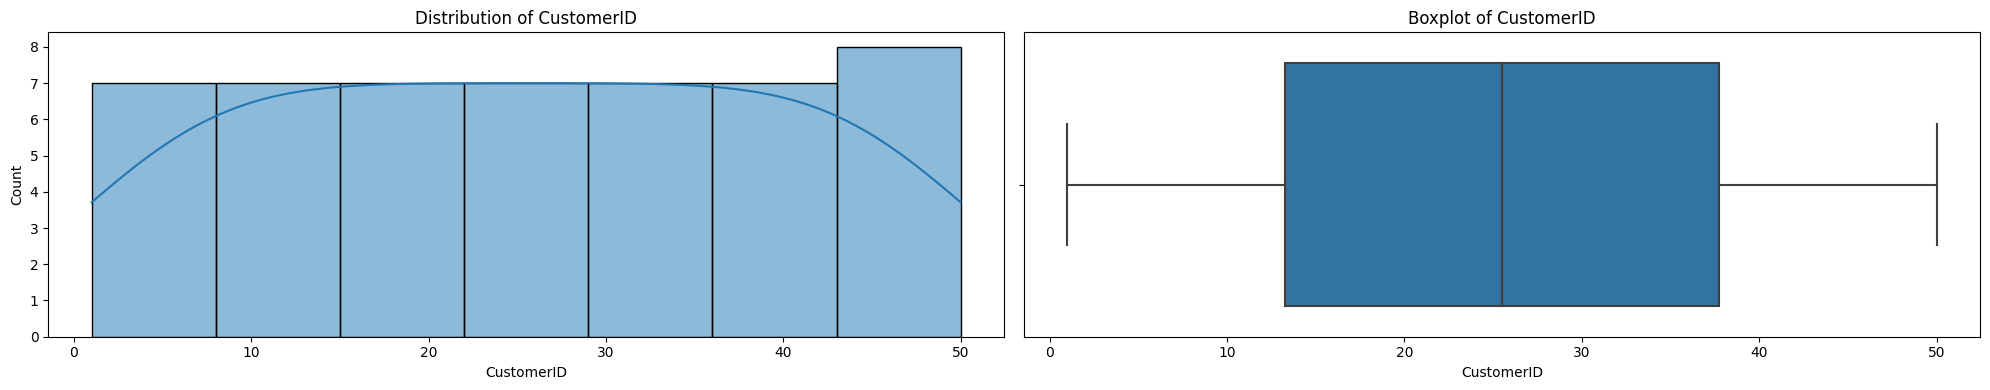

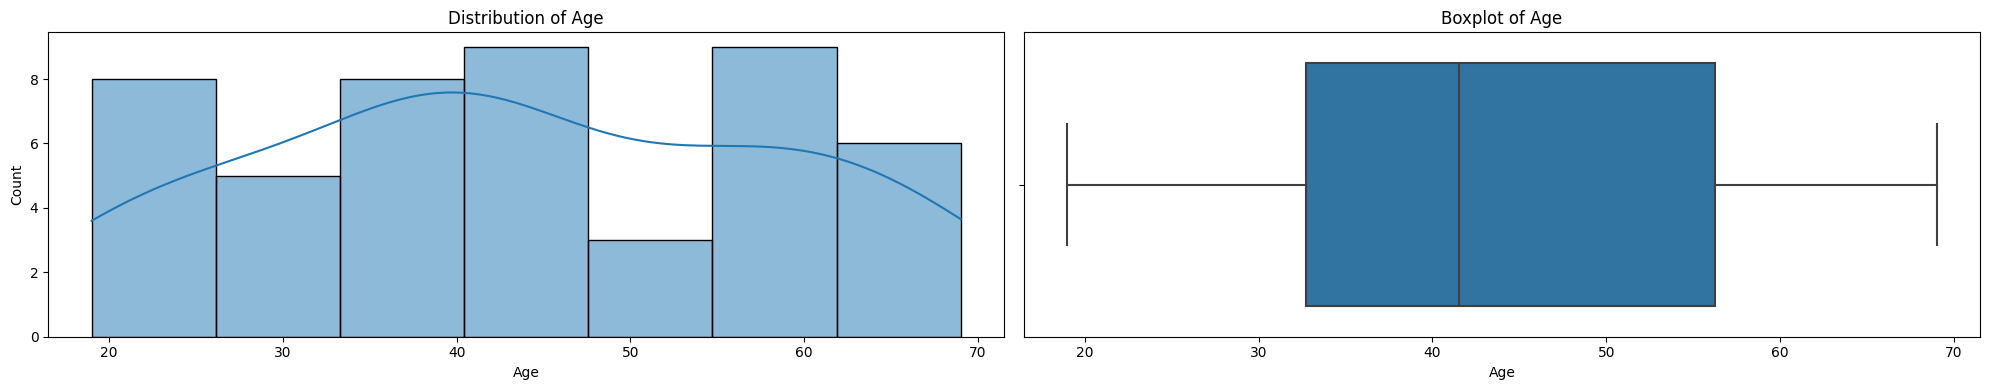

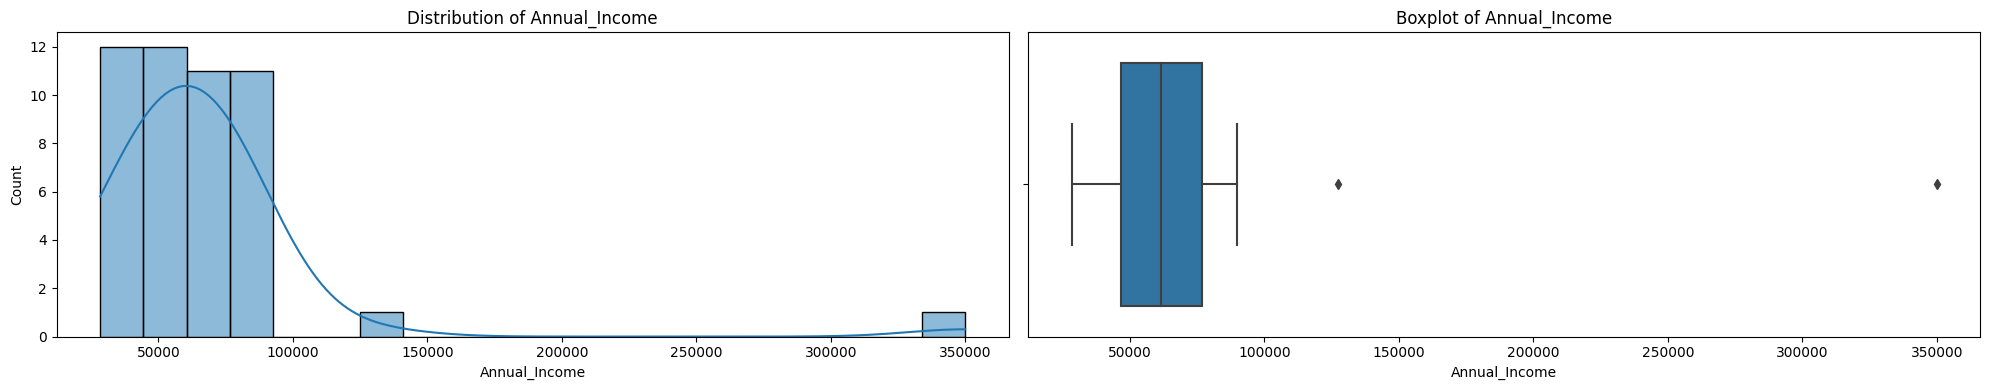

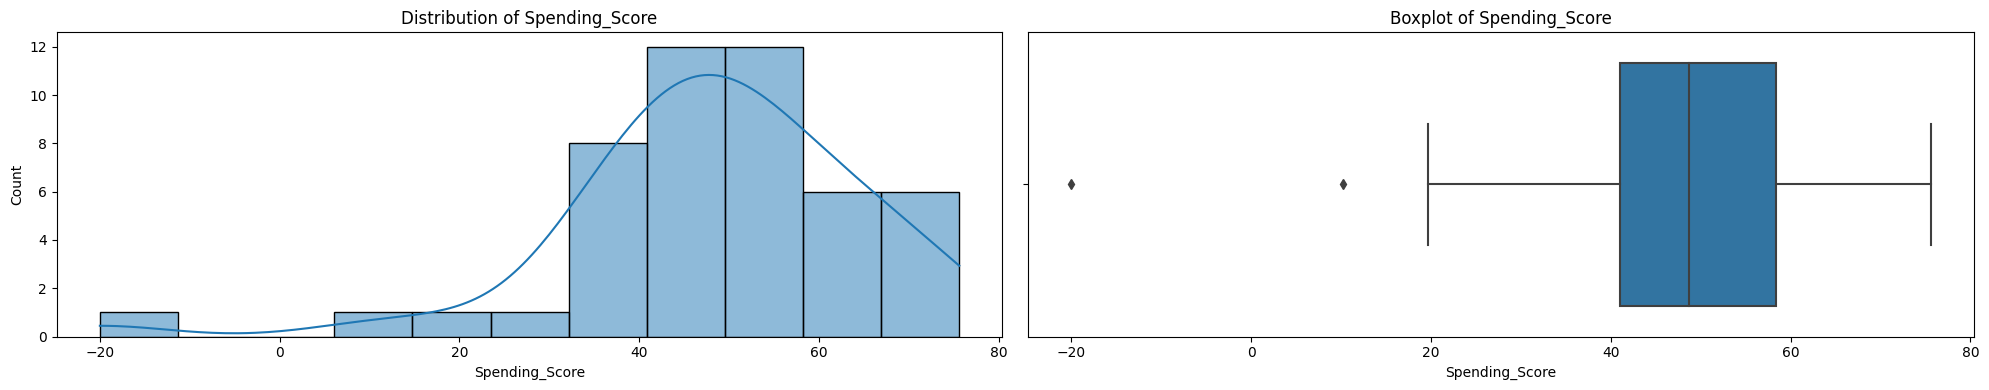

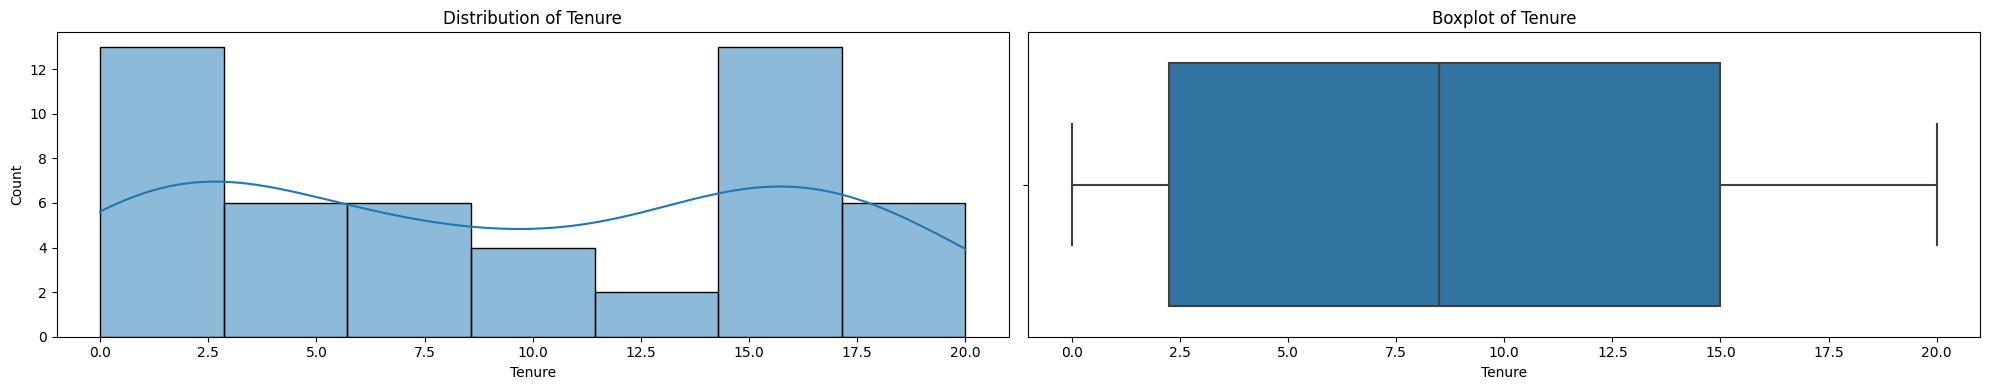

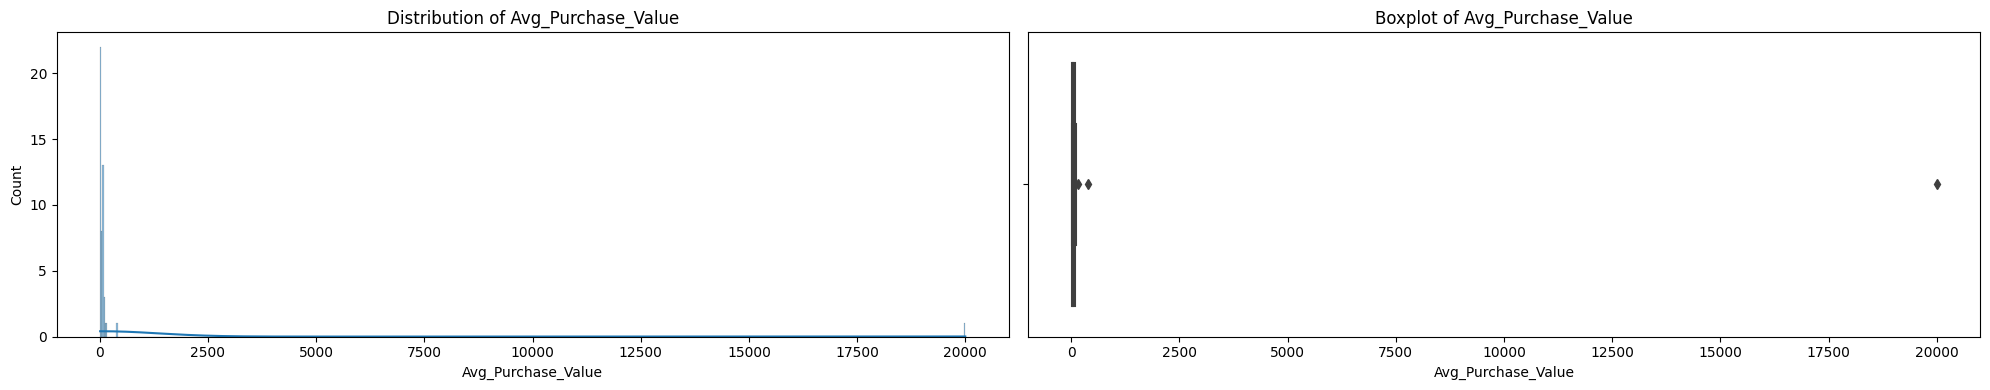

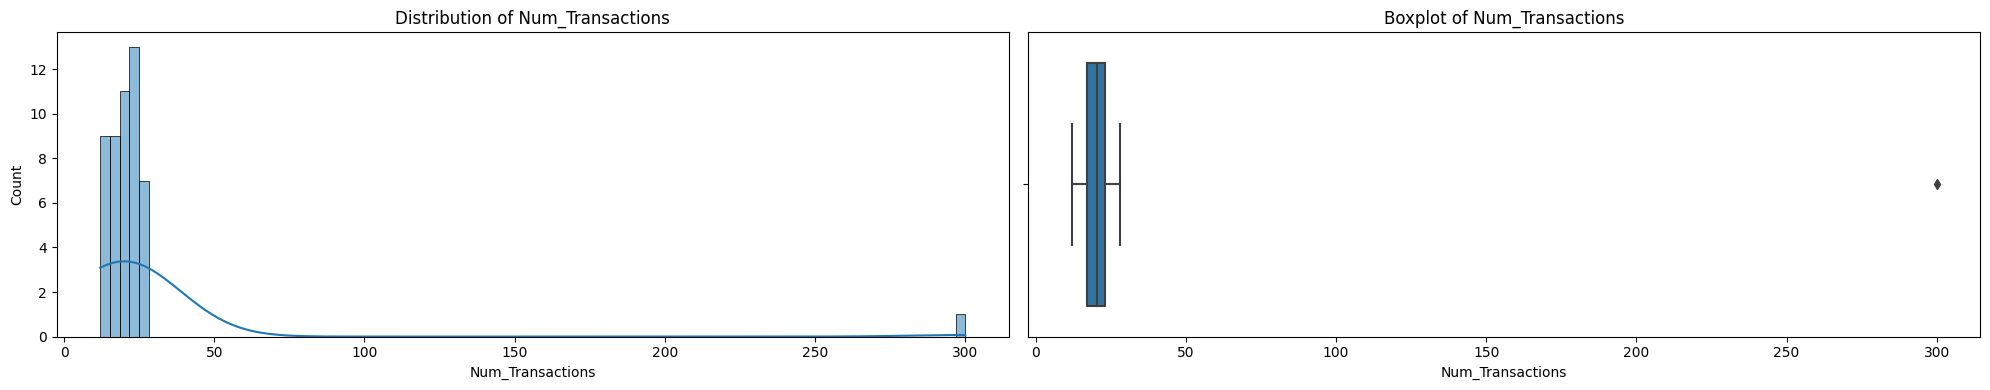

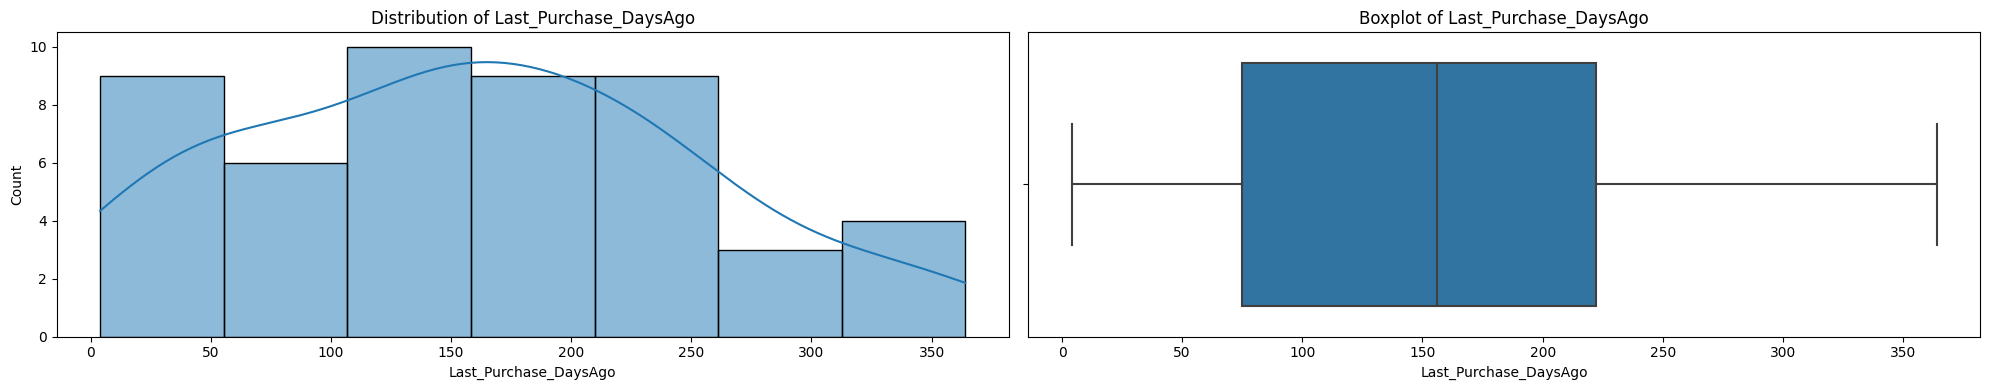

In [9]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(20,4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


#### Bivariate Analysis

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Data Cleaning & Feature Engineering

In [ ]:
# handling null values
for col in numeric_cols:
    df[col].fillna(df[col].median(),inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [ ]:
# Data Encoding
df['Gender_Num'] = df['Gender'].map({'Male':1, 'Female':0})
df['HasCC_Num'] = df['Has_Credit_Card'].map({'Yes':1,'No':0})

# or we can use get_dummies to encode but choose any one of it
new_df=pd.get_dummies(df,dtype=int,drop_first=True)
new_df.head()

In [ ]:
new_df.drop(['Gender_Num','HasCC_Num'],axis=1,inplace=True)

#### Save cleaned data

In [ ]:
df.to_csv("cleaned_data.csv")

#### Scaling the dataste

In [ ]:
numeric_cols=numeric_cols[1:]
numeric_cols

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df[numeric_cols]=scaler.fit_transform(new_df[numeric_cols])

#### Save scaled data

In [ ]:
df.to_csv("cleaned_scaled_data.csv")